In [1]:
import numpy as np
import scipy.stats
import pylab as plt
from matplotlib import pyplot as plt
from scipy import stats
import random
import math

!pip install astroML
from astroML.datasets import fetch_dr7_quasar

import astropy

import time

In [2]:
data = fetch_dr7_quasar()
z = data['redshift']

First, let's plot our dataset.

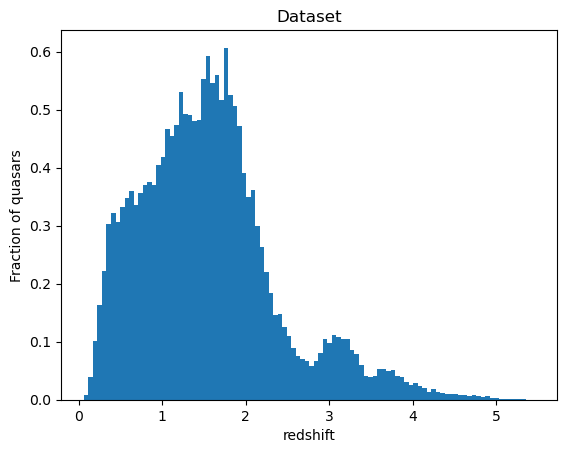

In [3]:
bin = 100
a,b,c = plt.hist(z,bin,density=True)
plt.xlabel('redshift')
plt.ylabel('Fraction of quasars')
plt.title('Dataset')
plt.show()

#expected distribution: periodic
#z = const * (N-M)  where M = M(n), n quantum number, M(n) is different with N 
#peaks separation: delta(z) = 0.7 circa

Let's upsample our dataset, first with rejection sampling, then with inverse transform.

## Rejection sampling

We generate couples $(x,y)$ of random uniform numbers in a box that contains our dataset. Let's consider an $x$ that falls in the $n^{th}$ bin. We check that the respective $y$ is lower than the height of the bin: if this is true, we keep $x$; otherwise, we discard it.

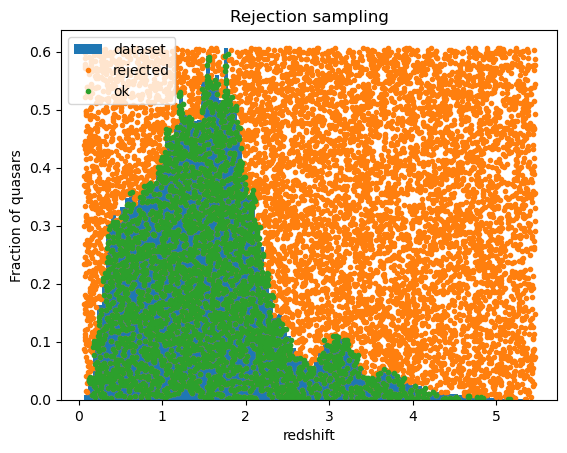

In [4]:
a,b,c = plt.hist(z,100,density=True,label='dataset')

x = np.random.uniform(np.min(z),np.max(z),10000)  # casual numbers generated in a box
y = np.random.uniform(np.min(a),np.max(a),10000)

index_x = np.searchsorted(b,x)-1                  # index of the bin where I find each x
sample_x = x[y<a[index_x]]                        # casual numbers that I keep: my new sample
sample_y = y[y<a[index_x]]

plt.plot(x,y,'.',label='rejected')
plt.plot(sample_x,sample_y,'.',label='ok')

plt.xlabel('redshift')
plt.ylabel('Fraction of quasars')
plt.title('Rejection sampling')
plt.legend()
plt.show()

We have obtained a new sample from our dataset. The two samples should be distributed in the same way. Let's check that the two distributions look similar.

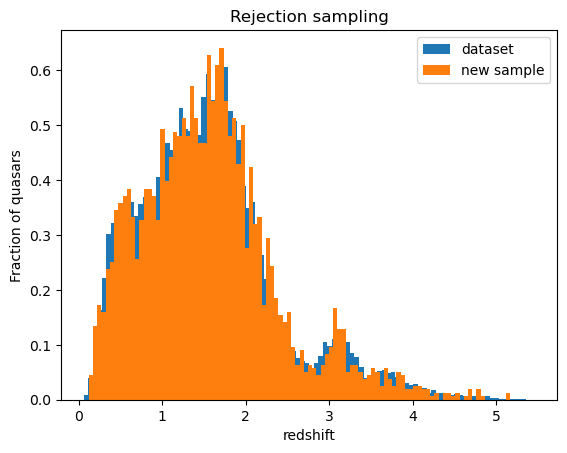

In [7]:
a,b,c = plt.hist(z,100,density=True,label='dataset')
a,b,c = plt.hist(sample_x,100,density=True,label='new sample')
plt.title('Rejection sampling')
plt.xlabel('redshift')
plt.ylabel('Fraction of quasars')
plt.legend()
plt.show()

## Inverse transform sampling

First, we need the cumulative distribution of our dataset.

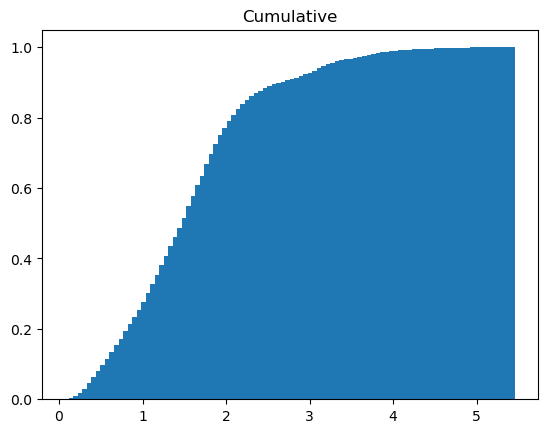

In [26]:
a,b,c = plt.hist(z,100,density=True,cumulative=True)
plt.title('Cumulative')
plt.show()

Now we generate random uniform numbers $u$ in the interval $[0,1]$. Let's consider a value of $u$. It is (approximately) equal to the height of the $n^{th}$ bin of the cumulative distrubution: we generate a random number in that bin. The taller the bin, the more values of $u$ will be equal to the height of that bin and, therefore, the more random numbers will begenerated in that interval.

In [27]:
u = np.random.uniform(0,1,10000)
index_u = np.searchsorted(a,u)
sample_x = np.random.uniform(b[index_u],b[index_u+1])

We have obtained a new sample from our dataset. Again, the two samples should be distributed in the same way. Let's check that the two distributions look similar.

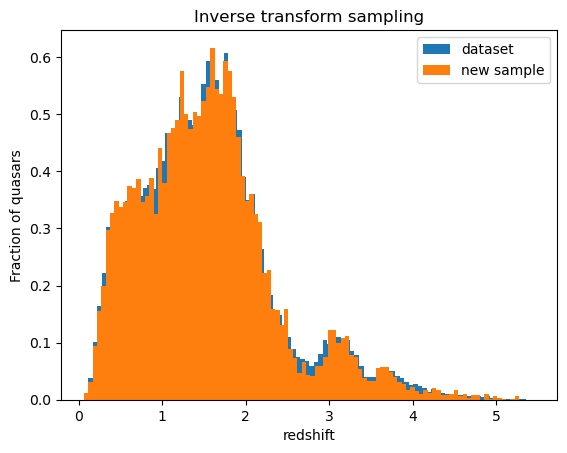

In [28]:
a0,b0,c0 = plt.hist(z,100,density=True,label='dataset')
a1,b1,c1=plt.hist(sample_x,100,density=True,label='new sample')
plt.title('Inverse transform sampling')
plt.xlabel('redshift')
plt.ylabel('Fraction of quasars')
plt.legend()
plt.show()